In [19]:
import glob
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
n_0 = 100
jump = 75

root_dir = f"LPA/GLR/Jump_{jump}_N0_{n_0}"

In [23]:
# df = pd.read_csv(f"{root_dir}/LSTM_1500_run000_n{n_0}_alpha0.95_bootB1.csv")

# Find all matching CSV files
all_files = glob.glob(os.path.join(root_dir, "LSTM_*_run*.csv"))
print(all_files)
dfs = []
for file in all_files:
    # Read only the column you care about
    df = pd.read_csv(file, usecols=["windows_1"])
    
    # Rename the column to something unique (e.g., filename without extension)
    name = os.path.splitext(os.path.basename(file))[0]
    df = df.rename(columns={"windows_1": f"windows_1_{name}"})
    
    dfs.append(df)

# Concatenate all on columns (axis=1)
print(len(dfs))
df = pd.concat(dfs, axis=1)
df["windows_1_mean"] = df.mean(axis=1)

# print(final_df.head())

['LPA/GLR/Jump_75_N0_100/LSTM_1500_run001_n100_alpha0.95_bootB10.csv', 'LPA/GLR/Jump_75_N0_100/LSTM_1500_run000_n100_alpha0.95_bootB10.csv']
2


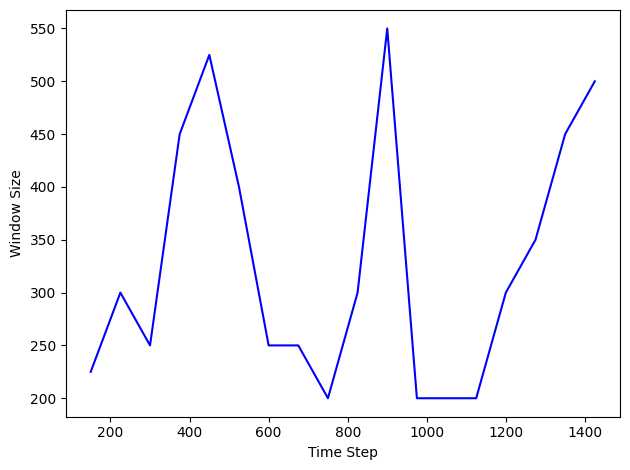

In [30]:
plt.plot(jump*np.arange(len(df['windows_1_mean']))[2:], df['windows_1_mean'][2:], color='blue')

plt.xlabel('Time Step')
plt.ylabel('Window Size')
# plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=3)
plt.tight_layout()
plt.savefig(f"{root_dir}/window_size.png", format='png', dpi=600, transparent=True)
plt.show()